# More detailed steps can be found in the *"Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow"* textbook.

# 1- Explore the Data
**Note**:

- try to get insights from a field expert for these steps.

### a. Create a copy of the data for exploration (sampling it down to a manageable size if necessary).

### b. Create a Jupyter notebook to keep a record of your data exploration.

### c. Study each attribute and its characteristics:
• Name

• Type (categorical, int/float, bounded/unbounded, text, structured, etc.)

• % of missing values

• Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)

• Usefulness for the task

• Type of distribution (Gaussian, uniform, logarithmic, etc.)

### d. For supervised learning tasks, identify the target attribute(s).

### e. Visualize the data.

### f. Study the correlations between attributes.

### g. Study how you would solve the problem manually.

### h. Identify the promising transformations you may want to apply.

### i. Identify extra data that would be useful.

### j. Document what you have learned.


# 2- Prepare the Data
**Notes**:

• Work on copies of the data (keep the original dataset intact).

• Write functions for all data transformations you apply, for five reasons:
* So you can easily prepare the data the next time you get a fresh dataset

* So you can apply these transformations in future projects.

* To clean and prepare the test set

* To clean and prepare new data instances once your solution is live

* To make it easy to treat your preparation choices as hyperparameters

### a. Clean the data:
• Fix or remove outliers (optional).

• Fill in missing values (e.g., with zero, mean, median…) or drop their rows (or
columns).

### b. Perform feature selection (optional):
• Drop the attributes that provide no useful information for the task.

### c. Perform feature engineering, where appropriate:
• Discretize continuous features.

• Decompose features (e.g., categorical, date/time, etc.).

• Add promising transformations of features (e.g., log(x), sqrt(x), etc.).

• Aggregate features into promising new features.

### d. Perform feature scaling:
• Standardize or normalize features.

# 3- Shortlist Promising Models
**Notes**:

• If the data is huge, you may want to sample smaller training sets so you can train
many different models in a reasonable time (be aware that this penalizes complex
models such as large neural nets or random forests).

• Once again, try to automate these steps as much as possible.

### a. Train many quick-and-dirty models from different categories 
(e.g., linear, naive Bayes, SVM, random forest, neural net, etc.) using standard parameters.

### b. Measure and compare their performance:
• For each model, use N-fold cross-validation and compute the mean and stan‐
dard deviation of the performance measure on the N folds.

### c. Analyze the most significant variables for each algorithm.

### d. Analyze the types of errors the models make:
• What data would a human have used to avoid these errors?

### e. Perform a quick round of feature selection and engineering.

### f. Perform one or two more quick iterations of the five previous steps.

### g. Shortlist the top three to five most promising models, preferring models that make different types of errors.

# 4- Fine-Tune the System
**Notes**:

• You will want to use as much data as possible for this step, especially as you move
toward the end of fine-tuning.

• As always, automate what you can.

### a. Fine-tune the hyperparameters using cross-validation:

• Treat your data transformation choices as hyperparameters, especially when
you are not sure about them (e.g., if you’re not sure whether to replace missing
values with zeros or with the median value, or to just drop the rows).

• Unless there are very few hyperparameter values to explore, prefer random
search over grid search. If training is very long, you may prefer a Bayesian
optimization approach.

### b. Try ensemble methods. Combining your best models will often produce better performance than running them individually.

### c. Once you are confident about your final model, measure its performance on the test set to estimate the generalization error.

In [200]:
# All imports will be here

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [64]:
housing = pd.read_csv('housing.csv')
housing_copy = housing.copy()


# 1- Explore the Data

In [65]:
housing_copy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [66]:
housing_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [67]:
housing_copy.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [68]:
housing_copy.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

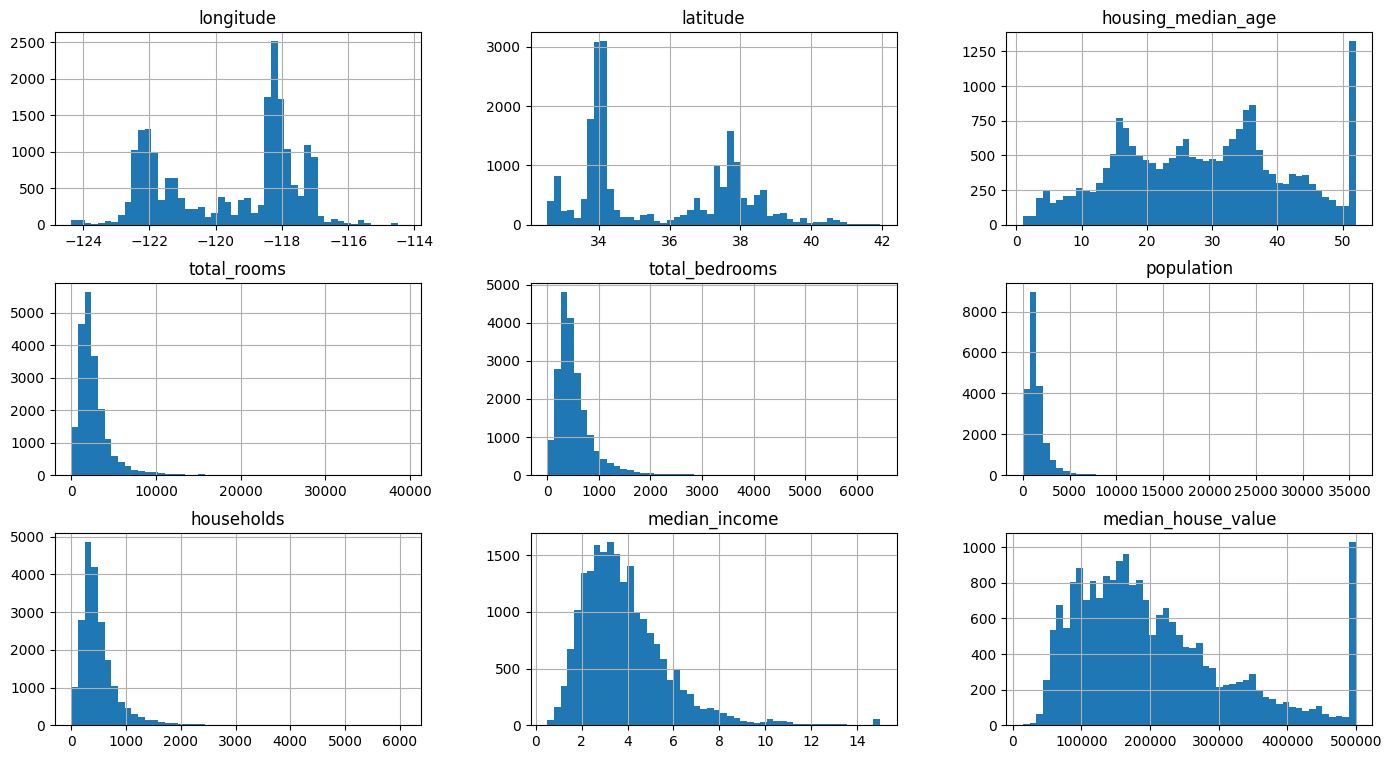

In [69]:
housing_copy.hist(figsize=(17, 9), bins=50)
plt.show()

# some features are right skewed which will need to be dealt with
# housing_median_age and median_house_value feayures are capped. 

In [70]:
housing_copy.query("housing_median_age > 51")['housing_median_age'].value_counts()

# looks like housing_median_age is capped at 52

housing_median_age
52.0    1273
Name: count, dtype: int64

In [71]:
housing_copy.query("median_house_value > 500000")['median_house_value'].value_counts()

# looks like median_house_value is capped at 500001

median_house_value
500001.0    965
Name: count, dtype: int64

In [72]:
corr_mtx = housing_copy.corr(numeric_only=True)
corr_mtx

# median_house_value is highly correlated to median_income

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [73]:
corr_mtx['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

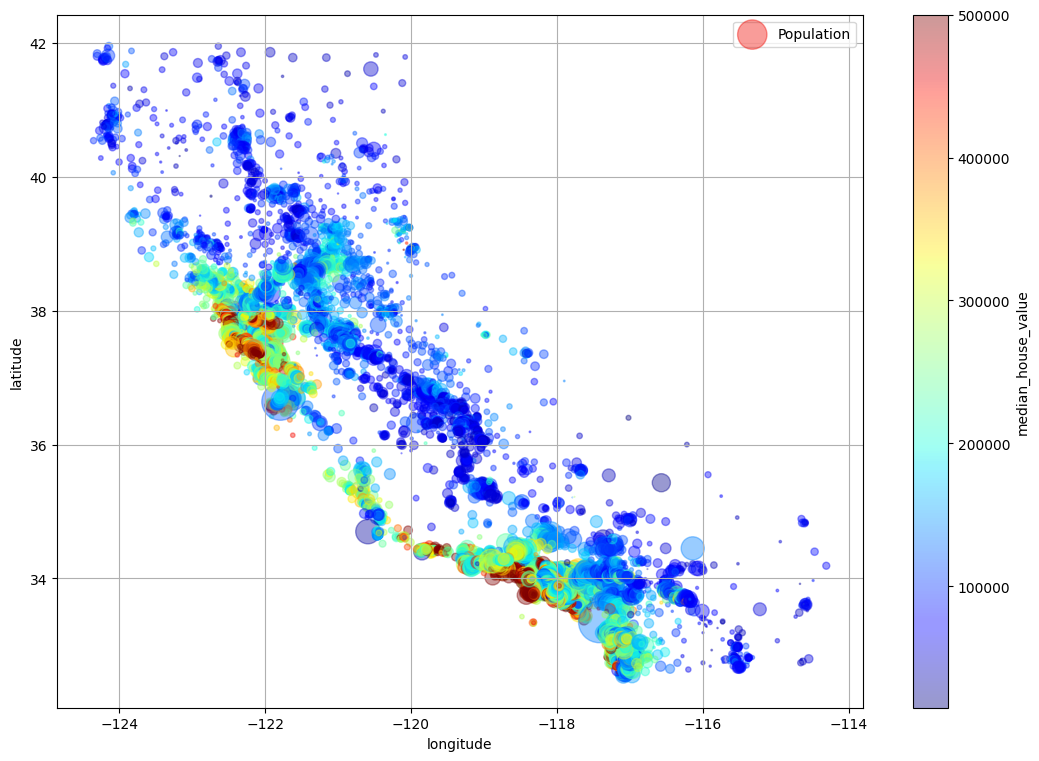

In [74]:
housing_copy.plot(kind='scatter', x='longitude', y='latitude', 
                  grid=True, alpha=.4,
                  s=housing['population']/40, label='Population',
                  c='median_house_value', cmap='jet', colorbar=True,
                  legend=True, figsize=(13, 9))
plt.show()

# This seems like California indeed!

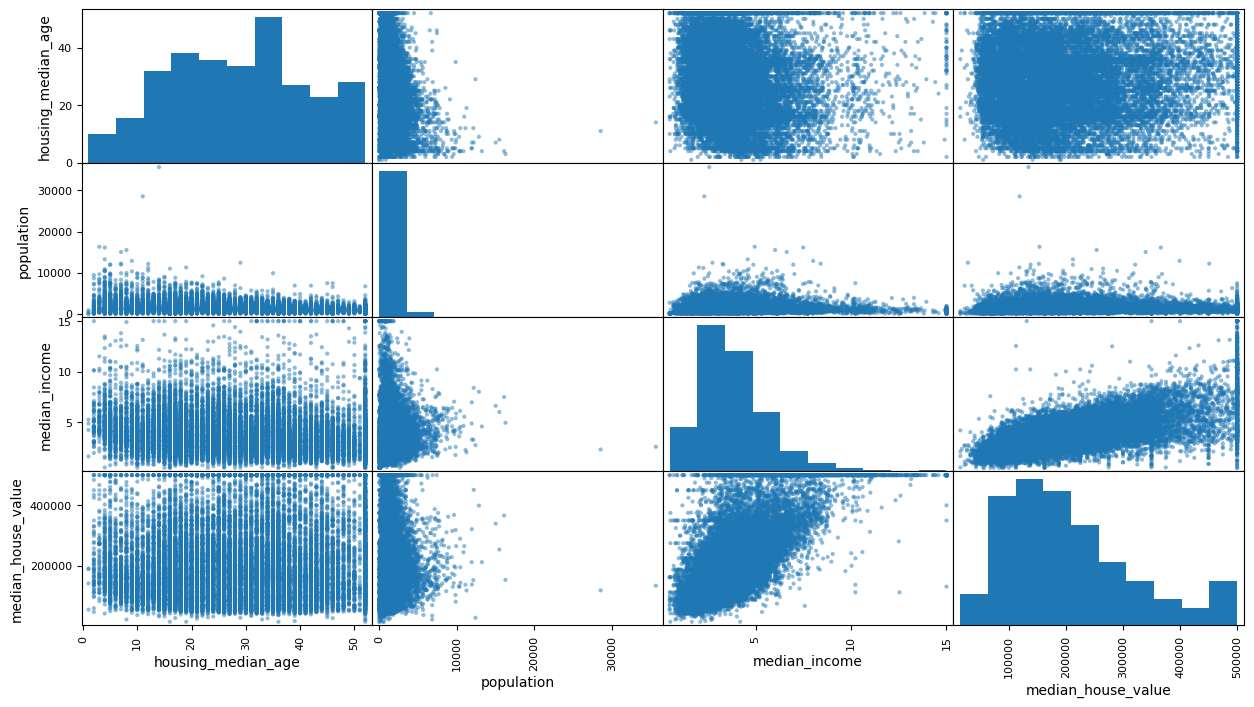

In [75]:
# scatter matrix

attributes = ['housing_median_age', 'population', 'median_income', 'median_house_value']
scatter_matrix(housing_copy[attributes], figsize=(15, 8))

plt.show()

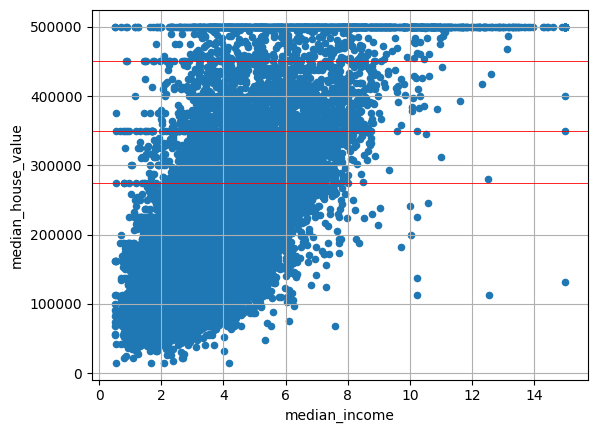

In [76]:
housing_copy.plot(kind='scatter', x='median_income', y='median_house_value', grid=True)

plt.axhline(y=450000, color='red', linewidth=.6)
plt.axhline(y=350000, color='red', linewidth=.6)
plt.axhline(y=275000, color='red', linewidth=.6)
plt.show()

#the data is capped beyond 500000.
#There is some data squeezed at 450k, 350k and 27.5k.
#the correlation is strong

#### Create a Test Set

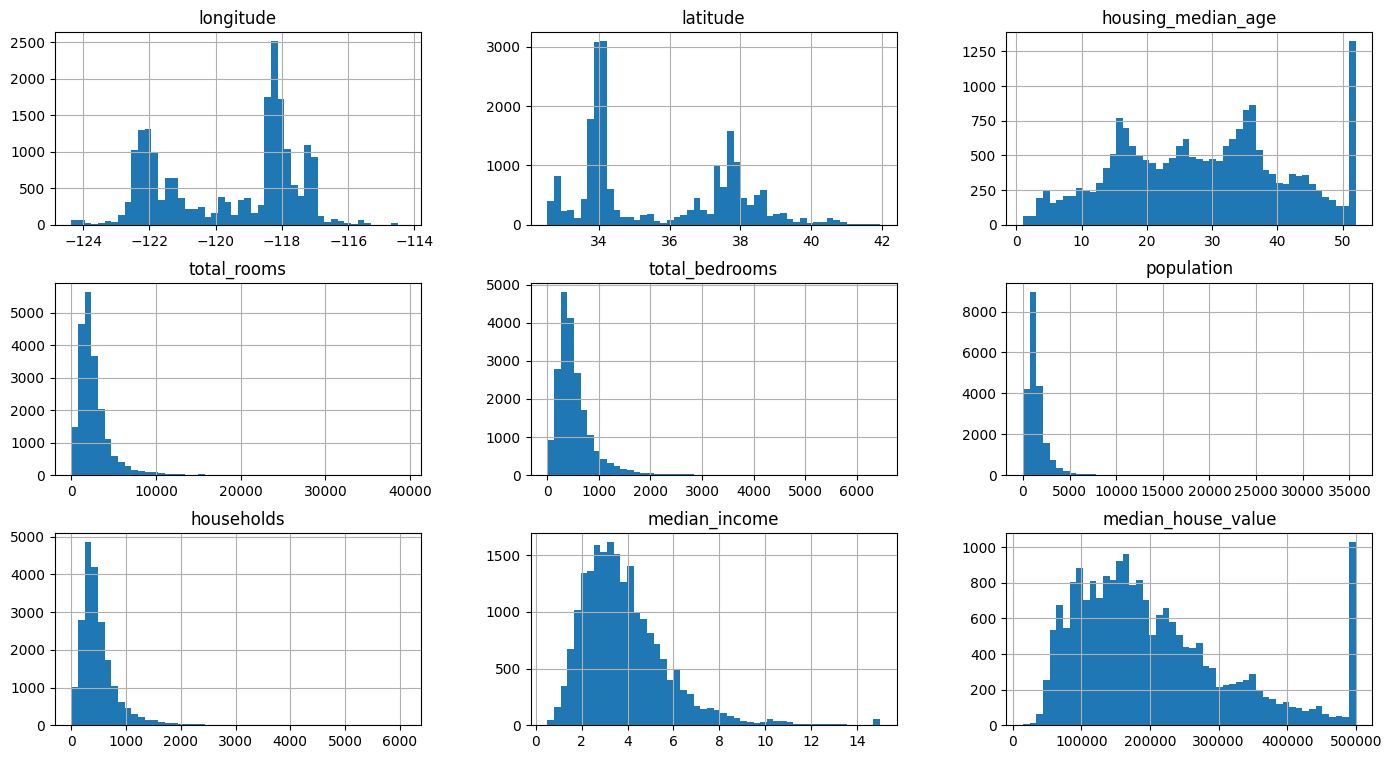

In [77]:
housing_copy.hist(figsize=(17, 9), bins=50)
plt.show()

In [78]:
# we saw that the median_income feature is highly correlated to the median_house_value.
# since our dataset is not large enough, we need to use stratified sampling when we split
# the data to avoid the risk of sample bias. 

median_income_desc = housing_copy['median_income'].describe()
median_income_desc

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [79]:
housing_copy['income_category'] = pd.cut(housing_copy['median_income'],
                                         bins=[0, 2, 3, 4, 4.5, 5.5, np.inf], 
                                         labels=[1, 2, 3, 4, 5, 6])

housing_copy['income_category'].value_counts().sort_index()

income_category
1    2457
2    4946
3    5150
4    2086
5    2801
6    3200
Name: count, dtype: int64

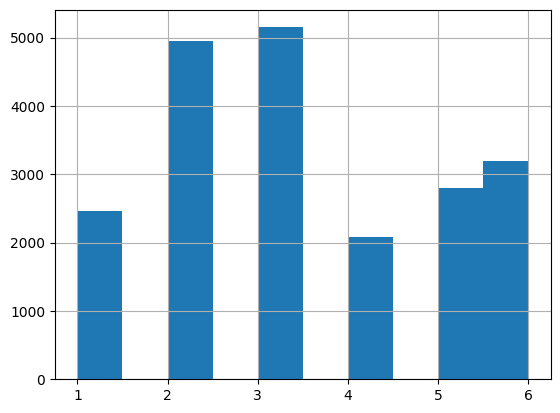

In [80]:
housing_copy['income_category'].hist()
plt.show()

In [81]:
strat_train, strat_test = train_test_split(housing_copy, test_size=.2, 
                                           stratify=housing_copy['income_category'],
                                           random_state=42)

strat_train['income_category'].value_counts(normalize=True), housing_copy['income_category'].value_counts(normalize=True)

(income_category
 3    0.249516
 2    0.239644
 6    0.155039
 5    0.135719
 1    0.119004
 4    0.101078
 Name: proportion, dtype: float64,
 income_category
 3    0.249516
 2    0.239632
 6    0.155039
 5    0.135707
 1    0.119041
 4    0.101066
 Name: proportion, dtype: float64)

In [82]:
strat_train = strat_train.drop(columns='income_category', axis=1)
housing_copy = housing_copy.drop(columns='income_category', axis=1)

In [83]:
# Experimenting different attribute combinations

strat_train['rooms_per_house'] = strat_train['total_rooms'] / strat_train['households']
strat_train['bedrooms_per_house'] = strat_train['total_bedrooms'] / strat_train['households']
strat_train["people_per_house"] = strat_train["population"] / strat_train["households"]
strat_train['bedrooms_ratio'] = strat_train['total_bedrooms'] / strat_train['total_rooms']


strat_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_per_house,people_per_house,bedrooms_ratio
14281,-117.13,32.71,44.0,1697.0,413.0,1396.0,363.0,1.5474,83300.0,NEAR OCEAN,4.674931,1.137741,3.845730,0.243371
6955,-118.06,33.98,42.0,1342.0,243.0,615.0,208.0,5.4381,186900.0,<1H OCEAN,6.451923,1.168269,2.956731,0.181073
1015,-121.77,37.67,20.0,8068.0,1217.0,3489.0,1259.0,5.7907,264200.0,INLAND,6.408261,0.966640,2.771247,0.150843
3127,-118.01,35.12,15.0,1926.0,361.0,917.0,316.0,3.3889,68500.0,INLAND,6.094937,1.142405,2.901899,0.187435
12803,-121.45,38.60,44.0,2324.0,413.0,823.0,375.0,4.6625,158900.0,INLAND,6.197333,1.101333,2.194667,0.177711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10177,-117.97,33.86,12.0,1370.0,367.0,1022.0,296.0,3.6471,141700.0,<1H OCEAN,4.628378,1.239865,3.452703,0.267883
16336,-121.35,38.04,12.0,6217.0,1019.0,3771.0,961.0,3.7206,146000.0,INLAND,6.469303,1.060354,3.924037,0.163905
1497,-122.00,37.95,9.0,2214.0,256.0,848.0,239.0,6.8145,339200.0,INLAND,9.263598,1.071130,3.548117,0.115628
8954,-118.39,34.02,38.0,2447.0,636.0,1312.0,574.0,3.5909,279400.0,<1H OCEAN,4.263066,1.108014,2.285714,0.259910


In [84]:
strat_train.corr(numeric_only=True)['median_house_value'].sort_values(ascending=False)

# rooms_per_house and bedrooms_ratio exhibits a slightly high correlation to the median house value

median_house_value    1.000000
median_income         0.688729
rooms_per_house       0.146124
total_rooms           0.135371
housing_median_age    0.115040
households            0.067379
total_bedrooms        0.050220
people_per_house     -0.025396
population           -0.025415
bedrooms_per_house   -0.044551
longitude            -0.046013
latitude             -0.144636
bedrooms_ratio       -0.259883
Name: median_house_value, dtype: float64

# 2- Prepare the Data

In [116]:
strat_train['median_age_range'] = \
       pd.cut(strat_train['housing_median_age'], 
       bins=[0, 15, 30, 40, 50, 60],
       labels=['0-15', '15-30', '30-40', '40-50', '50-60'])

strat_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_per_house,people_per_house,bedrooms_ratio,median_age_range
14281,-117.13,32.71,44.0,1697.0,413.0,1396.0,363.0,1.5474,83300.0,NEAR OCEAN,4.674931,1.137741,3.845730,0.243371,40-50
6955,-118.06,33.98,42.0,1342.0,243.0,615.0,208.0,5.4381,186900.0,<1H OCEAN,6.451923,1.168269,2.956731,0.181073,40-50
1015,-121.77,37.67,20.0,8068.0,1217.0,3489.0,1259.0,5.7907,264200.0,INLAND,6.408261,0.966640,2.771247,0.150843,15-30
3127,-118.01,35.12,15.0,1926.0,361.0,917.0,316.0,3.3889,68500.0,INLAND,6.094937,1.142405,2.901899,0.187435,0-15
12803,-121.45,38.60,44.0,2324.0,413.0,823.0,375.0,4.6625,158900.0,INLAND,6.197333,1.101333,2.194667,0.177711,40-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10177,-117.97,33.86,12.0,1370.0,367.0,1022.0,296.0,3.6471,141700.0,<1H OCEAN,4.628378,1.239865,3.452703,0.267883,0-15
16336,-121.35,38.04,12.0,6217.0,1019.0,3771.0,961.0,3.7206,146000.0,INLAND,6.469303,1.060354,3.924037,0.163905,0-15
1497,-122.00,37.95,9.0,2214.0,256.0,848.0,239.0,6.8145,339200.0,INLAND,9.263598,1.071130,3.548117,0.115628,0-15
8954,-118.39,34.02,38.0,2447.0,636.0,1312.0,574.0,3.5909,279400.0,<1H OCEAN,4.263066,1.108014,2.285714,0.259910,30-40


In [117]:
strat_train_feats = strat_train.drop(columns='median_house_value', axis=1)
strat_train_labels = strat_train['median_house_value']

In [118]:
strat_train_feats.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        162
population              0
households              0
median_income           0
ocean_proximity         0
rooms_per_house         0
bedrooms_per_house    162
people_per_house        0
bedrooms_ratio        162
median_age_range        0
dtype: int64

In [122]:
strat_train_feats_num = strat_train_feats.select_dtypes(include=np.number).sort_index()
strat_train_feats_cat = strat_train_feats.select_dtypes(exclude=np.number).sort_index()

In [127]:
iterativeimputer = IterativeImputer(max_iter=10, random_state=42)
X = iterativeimputer.fit_transform(strat_train_feats_num)
strat_train_feats_num_imp = pd.DataFrame(X, columns=strat_train_feats_num.columns,
                                         index=strat_train_feats_num.index)
strat_train_feats_num_imp

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_per_house,people_per_house,bedrooms_ratio
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,1.023810,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,0.971880,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,1.073446,2.802260,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,1.073059,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,1.081081,2.181467,0.172096
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,5.045455,1.133333,2.560606,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,6.114035,1.315789,3.122807,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,5.205543,1.120092,2.325635,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,5.329513,1.171920,2.123209,0.219892


In [129]:
# we will try the iterative imputer first and see the performance.

#simpleimputer = SimpleImputer(strategy='median')
#simpleimputer.fit_transform(strat_train_feats_num)

#### Handling Text and Categorical Attributes

In [131]:
ohe = OneHotEncoder(handle_unknown='ignore')
strat_train_feats_cat_enc = ohe.fit_transform(strat_train_feats_cat)

In [132]:
strat_train_feats_cat_enc.toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [133]:
ohe.feature_names_in_, ohe.get_feature_names_out()

(array(['ocean_proximity', 'median_age_range'], dtype=object),
 array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
        'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
        'ocean_proximity_NEAR OCEAN', 'median_age_range_0-15',
        'median_age_range_15-30', 'median_age_range_30-40',
        'median_age_range_40-50', 'median_age_range_50-60'], dtype=object))

In [134]:
strat_train_feats_cat_enc = pd.DataFrame(strat_train_feats_cat_enc.toarray(),
                                         columns=ohe.get_feature_names_out())

strat_train_feats_cat_enc

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_age_range_0-15,median_age_range_15-30,median_age_range_30-40,median_age_range_40-50,median_age_range_50-60
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
16507,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16508,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16509,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16510,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### Feature Scaling and Transformation

In [138]:
# we will handle haeavy tailed or power law distributions before scaling.
# features with heavy tails:
#   - total_rooms   - total_bedrooms    -population - median_income - households    -bedrooms_ratio

In [139]:
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)

In [140]:
strat_train_feats_num_imp_tran = log_transformer.fit_transform(strat_train_feats_num_imp[['total_rooms', 
                           'total_bedrooms', 'population', 
                           'median_income', 'households']])

/home/elneklawy/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [141]:
strat_train_feats_num_imp_tran = strat_train_feats_num_imp_tran.sort_index()
strat_train_feats_num_imp_tran

,total_rooms,total_bedrooms,population,median_income,households
0,6.779922,4.859812,5.774552,2.119287,4.836282
1,8.867709,7.008505,7.783641,2.116424,7.037028
2,7.290975,5.247024,6.206576,1.982022,5.176150
3,7.149917,5.459586,6.324359,1.730434,5.389072
4,7.394493,5.634790,6.336826,1.347086,5.556828
...,...,...,...,...,...
20635,7.417580,5.924256,6.739337,0.444878,5.799093
20636,6.546785,5.010635,5.874931,0.938756,4.736198
20637,7.720462,6.184149,6.914731,0.530628,6.070738
20638,7.528332,6.013715,6.608001,0.624440,5.855072


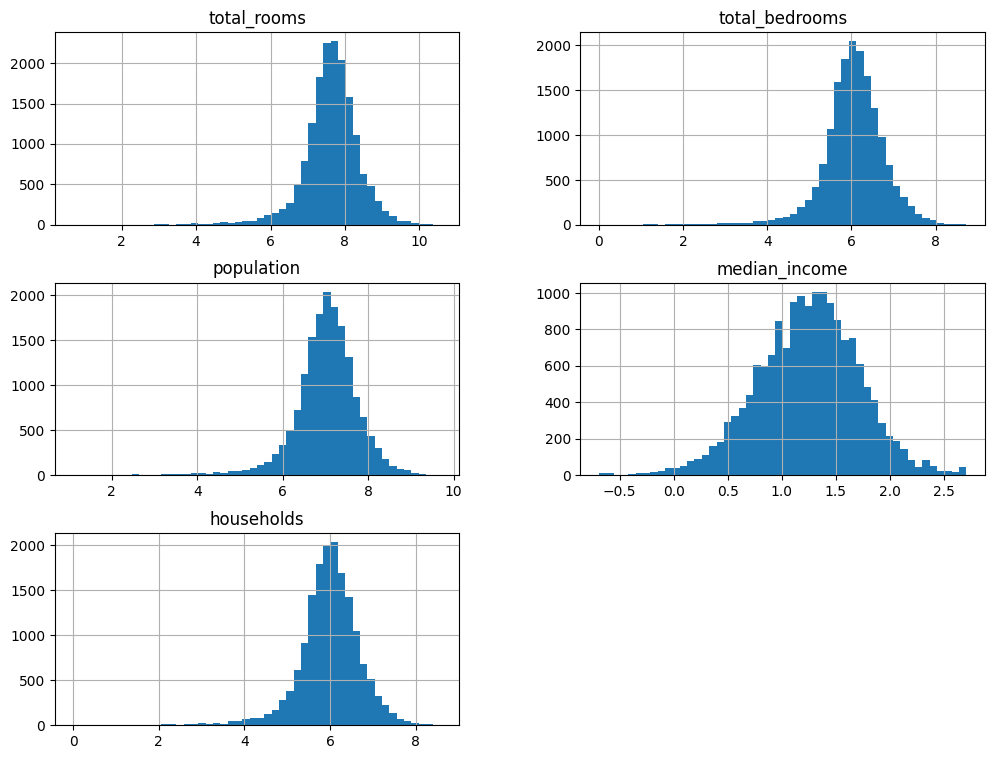

In [142]:
strat_train_feats_num_imp_tran.hist(figsize=(12, 9), bins=50)
plt.show()

In [143]:
untransformed = strat_train_feats_num_imp[['longitude', 'latitude',
                                           'rooms_per_house', 'bedrooms_per_house',
                                           'people_per_house', 'bedrooms_ratio']]
untransformed = untransformed.sort_index()
strat_train_feats_num_imp_tran = strat_train_feats_num_imp_tran.sort_index()

In [144]:
strat_train_feats_num_imp_tran = pd.concat([untransformed, strat_train_feats_num_imp_tran], axis=1)
strat_train_feats_num_imp_tran

,longitude,latitude,rooms_per_house,bedrooms_per_house,people_per_house,bedrooms_ratio,total_rooms,total_bedrooms,population,median_income,households
0,-122.23,37.88,6.984127,1.023810,2.555556,0.146591,6.779922,4.859812,5.774552,2.119287,4.836282
1,-122.22,37.86,6.238137,0.971880,2.109842,0.155797,8.867709,7.008505,7.783641,2.116424,7.037028
2,-122.24,37.85,8.288136,1.073446,2.802260,0.129516,7.290975,5.247024,6.206576,1.982022,5.176150
3,-122.25,37.85,5.817352,1.073059,2.547945,0.184458,7.149917,5.459586,6.324359,1.730434,5.389072
4,-122.25,37.85,6.281853,1.081081,2.181467,0.172096,7.394493,5.634790,6.336826,1.347086,5.556828
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,5.045455,1.133333,2.560606,0.224625,7.417580,5.924256,6.739337,0.444878,5.799093
20636,-121.21,39.49,6.114035,1.315789,3.122807,0.215208,6.546785,5.010635,5.874931,0.938756,4.736198
20637,-121.22,39.43,5.205543,1.120092,2.325635,0.215173,7.720462,6.184149,6.914731,0.530628,6.070738
20638,-121.32,39.43,5.329513,1.171920,2.123209,0.219892,7.528332,6.013715,6.608001,0.624440,5.855072


In [145]:
minmaxscaler = MinMaxScaler(feature_range=(0, 1))
strat_train_feats_num_imp_tran_sc = minmaxscaler.fit_transform(strat_train_feats_num_imp_tran)

In [149]:
strat_train_feats_num_imp_tran_sc

array([[0.2145749 , 0.5674814 , 0.042468  , ..., 0.543675  , 0.82690389,
        0.56325262],
       [0.21558704, 0.565356  , 0.03717388, ..., 0.77727331, 0.82606221,
        0.81956021],
       [0.21356275, 0.5642933 , 0.05172225, ..., 0.5939068 , 0.78654837,
        0.60283498],
       ...,
       [0.31680162, 0.73219979, 0.02984579, ..., 0.67624452, 0.35984418,
        0.70702225],
       [0.30668016, 0.73219979, 0.03072558, ..., 0.64058076, 0.38742447,
        0.68190496],
       [0.31477733, 0.72582359, 0.03019477, ..., 0.71347064, 0.45982617,
        0.7305642 ]])

In [150]:
strat_train_feats_num_imp_tran_sc = pd.DataFrame(strat_train_feats_num_imp_tran_sc, 
                                              columns=strat_train_feats_num_imp_tran.columns) 
strat_train_feats_num_imp_tran_sc

,longitude,latitude,rooms_per_house,bedrooms_per_house,people_per_house,bedrooms_ratio,total_rooms,total_bedrooms,population,median_income,households
0,0.214575,0.567481,0.042468,0.020469,0.001453,0.098406,0.615675,0.556430,0.543675,0.826904,0.563253
1,0.215587,0.565356,0.037174,0.018929,0.001094,0.108131,0.826854,0.802447,0.777273,0.826062,0.819560
2,0.213563,0.564293,0.051722,0.021940,0.001652,0.080367,0.667368,0.600764,0.593907,0.786548,0.602835
3,0.212551,0.564293,0.034188,0.021929,0.001447,0.138411,0.653100,0.625102,0.607602,0.712582,0.627633
4,0.212551,0.564293,0.037484,0.022166,0.001152,0.125351,0.677839,0.645162,0.609051,0.599880,0.647170
...,...,...,...,...,...,...,...,...,...,...,...
16507,0.329960,0.737513,0.028710,0.023715,0.001457,0.180845,0.680174,0.678305,0.655851,0.334634,0.675385
16508,0.317814,0.738576,0.036293,0.029124,0.001910,0.170897,0.592093,0.573699,0.555346,0.479832,0.551597
16509,0.316802,0.732200,0.029846,0.023323,0.001268,0.170860,0.710810,0.708061,0.676245,0.359844,0.707022
16510,0.306680,0.732200,0.030726,0.024859,0.001105,0.175846,0.691377,0.688547,0.640581,0.387424,0.681905


In [151]:
strat_train_feats_num_imp_tran_sc.describe()

,longitude,latitude,rooms_per_house,bedrooms_per_house,people_per_house,bedrooms_ratio,total_rooms,total_bedrooms,population,median_income,households
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16511.000000,16512.000000,16512.000000,16512.000000
mean,0.481957,0.330494,0.031477,0.022650,0.001833,0.168422,0.701686,0.692963,0.688890,0.569486,0.696679
std,0.203351,0.227496,0.018325,0.014727,0.007954,0.060660,0.075650,0.083699,0.085544,0.138611,0.085125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.257085,0.147715,0.024442,0.019933,0.001350,0.128888,0.666049,0.651744,0.647879,0.480487,0.656665
50%,0.590081,0.183847,0.029988,0.021208,0.001662,0.158613,0.704849,0.695076,0.692891,0.575378,0.700381
75%,0.641700,0.550478,0.035857,0.022734,0.002036,0.196644,0.744247,0.741059,0.738490,0.661472,0.745399
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Creating a Pipeline of All the Transformations

# 3- Shortlist Promising Models

In [152]:
housing_prepared = pd.concat([strat_train_feats_num_imp_tran_sc, strat_train_feats_cat_enc], axis=1)

In [158]:
housing_prepared['total_bedrooms'] = housing_prepared['total_bedrooms'].fillna(housing_prepared['total_bedrooms'].median())

In [159]:
housing_prepared

,longitude,latitude,rooms_per_house,bedrooms_per_house,people_per_house,bedrooms_ratio,total_rooms,total_bedrooms,population,median_income,...,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_age_range_0-15,median_age_range_15-30,median_age_range_30-40,median_age_range_40-50,median_age_range_50-60
0,0.214575,0.567481,0.042468,0.020469,0.001453,0.098406,0.615675,0.556430,0.543675,0.826904,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.215587,0.565356,0.037174,0.018929,0.001094,0.108131,0.826854,0.802447,0.777273,0.826062,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.213563,0.564293,0.051722,0.021940,0.001652,0.080367,0.667368,0.600764,0.593907,0.786548,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.212551,0.564293,0.034188,0.021929,0.001447,0.138411,0.653100,0.625102,0.607602,0.712582,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.212551,0.564293,0.037484,0.022166,0.001152,0.125351,0.677839,0.645162,0.609051,0.599880,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.329960,0.737513,0.028710,0.023715,0.001457,0.180845,0.680174,0.678305,0.655851,0.334634,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16508,0.317814,0.738576,0.036293,0.029124,0.001910,0.170897,0.592093,0.573699,0.555346,0.479832,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16509,0.316802,0.732200,0.029846,0.023323,0.001268,0.170860,0.710810,0.708061,0.676245,0.359844,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16510,0.306680,0.732200,0.030726,0.024859,0.001105,0.175846,0.691377,0.688547,0.640581,0.387424,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [163]:
strat_train_labels = pd.DataFrame(strat_train_labels.sort_index())
strat_train_labels

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [172]:
regressor = TransformedTargetRegressor(LinearRegression(), 
                                   transformer=MinMaxScaler())

In [173]:
regressor.fit(housing_prepared, strat_train_labels)

TransformedTargetRegressor(regressor=LinearRegression(),
                           transformer=MinMaxScaler())

In [174]:
predictions = regressor.predict(housing_prepared)

In [175]:
reg_rmse = mean_squared_error(strat_train_labels, predictions, squared=False)
reg_rmse

68856.72471363076

In [176]:
regressor.score(housing_prepared, strat_train_labels)

0.644952206172144

#### Try DecisionTreeRegressor model

In [178]:
tree_reg = TransformedTargetRegressor(DecisionTreeRegressor(), 
                                   transformer=MinMaxScaler())

In [179]:
tree_reg.fit(housing_prepared, strat_train_labels)

TransformedTargetRegressor(regressor=DecisionTreeRegressor(),
                           transformer=MinMaxScaler())

In [182]:
tree_reg.score(housing_prepared, strat_train_labels)

#This clearly an overfit

1.0

#### Try RandomForestRegressor model

In [192]:
rf_reg = RandomForestRegressor(random_state=42)

In [193]:
rf_reg.fit(housing_prepared, np.ravel(strat_train_labels))

RandomForestRegressor(random_state=42)

In [194]:
rf_reg.score(housing_prepared, strat_train_labels)

#i think there is some overfitting

0.9739359929710331

####